In [54]:
import tempfile
import pydicom

# Definimos el path en donde están las imágenes
BASE='C:/Users/joaco/Desktop/Mentoría/Imágenes Conci/Caso1'

# Enlistamos y ordenamos los archivos dicom de cada carpeta
imgs = os.listdir(BASE)
imgs.sort()

dataset = pydicom.dcmread(BASE + '/' + imgs[2])

def person_names_callback(dataset, data_element):
    if data_element.VR == "PN":
        data_element.value = "anonymous"

dataset.PatientID = "id"
dataset.walk(person_names_callback)


output_filename = 'C:/Users/joaco/Desktop/Mentoría/Imágenes Conci/Caso1'

dataset.save_as(output_filename)
output_filename

'C:\\Users\\joaco\\AppData\\Local\\Temp\\tmpq1zmygw9'

In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import pydicom as dicom
import os
import matplotlib.pyplot as plt
import cv2
#import scipy.ndimage
#from skimage import measure, morphology
#from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import SimpleITK as sitk

# Definimos el path en donde están las imágenes
BASE='C:/Users/joaco/Desktop/Mentoría/Imágenes Conci/Caso1'

# Enlistamos y ordenamos los archivos dicom de cada carpeta
imgs = os.listdir(BASE)

imgs.sort()
imgs

['.ipynb_checkpoints',
 '2.16.840.1.114498.1.42.15112202.7921.190513.90844.73218.1.1.1.1.dcm',
 '2.16.840.1.114498.1.42.15112202.7921.190513.90844.73221.1.1.1.1.dcm',
 'Untitled.ipynb',
 'poco útiles']

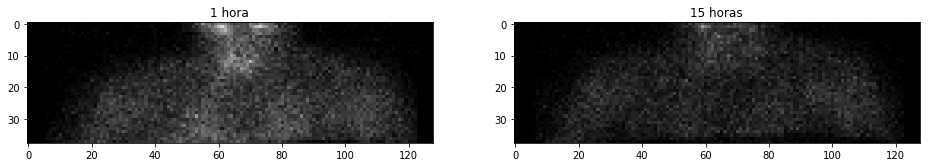

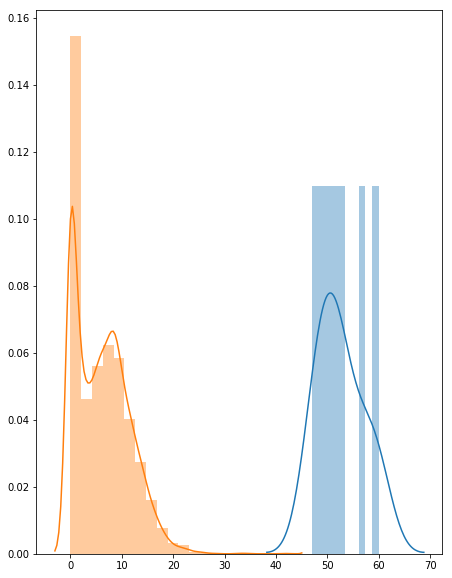

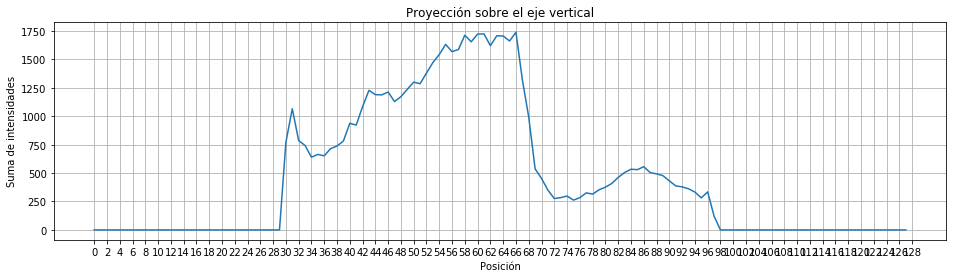

In [45]:
# Cargamos las imágenes de cada tiempo (sólo se usan las post_sc.dcm, que nos parecieron las mejores):

img1_dcm =  dicom.read_file(BASE + '/' + imgs[1])
img1 = img1_dcm.pixel_array

img2_dcm =  dicom.read_file(BASE + '/' + imgs[2])
img2 = img2_dcm.pixel_array

np.shape(img1)

# Graficamos las imágenes seteando el mismo rango de valores en la escala de grises para las tres imágenes
plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img1[17,30:68,:], cmap=plt.cm.gray, vmin=0,vmax=70)
plt.title('1 hora')
#plt.axis('off')
plt.subplot(122)
plt.imshow(img2[17,30:68,:], cmap=plt.cm.gray, vmin=0,vmax=70)
plt.title('15 horas')
#plt.axis('off')
plt.show()

plt.figure(figsize=(16,10))
plt.subplot(121)
imd=img1[17,30:68,:]
sns.distplot(imd[imd>45].flatten(),10)
#plt.subplot(122)
sns.distplot(img2[17,30:68,:].flatten(),20)


# Se calcula la proyección de la imagen sobre el eje y
proy_y_1_c=np.sum(img1[16],1)
s=np.shape(proy_y_1_c)

#plt.figure(figsize=(16,6))
#plt.title('Imagen t=1hr')
#plt.imshow(np.transpose(img1[:,:]))

plt.figure(figsize=(16,4))
plt.title('Proyección sobre el eje vertical')
plt.ylabel('Suma de intensidades')
plt.xlabel('Posición')
plt.plot(proy_y_1_c)
plt.grid(True)
plt.xticks(np.arange(0, s[0]+1,2))
plt.show()

#img1_dcm.pixel_array